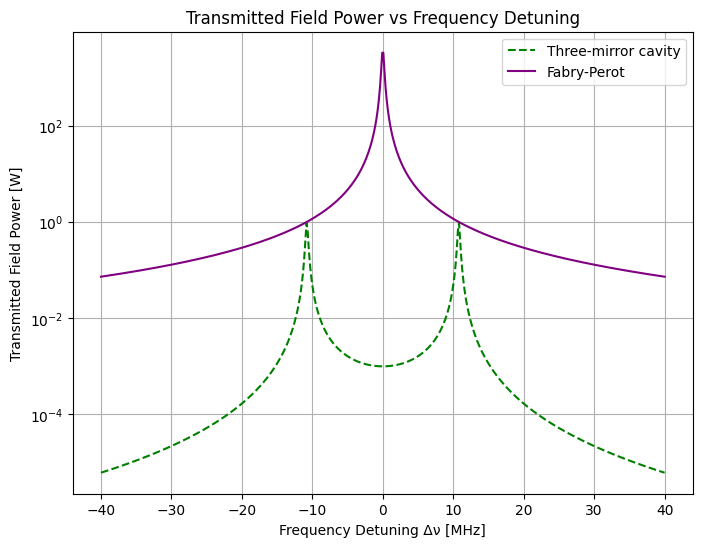

In [115]:
import numpy as np
import matplotlib.pyplot as plt


c = 3e8  # Speed of light (m/s)
L1_0 = 0.07 # (meters)
L2 = 0.07 
delta_L1 = 50e-9
L1 = L1_0 + delta_L1
wavelength = 1064e-9 # (meters)
f_carrier = c / wavelength
k = 2 * np.pi / wavelength  

# Mirror transmission and reflection coefficients
t1, t2, t3 = np.sqrt(0.001), np.sqrt(0.001), np.sqrt(0.001)  
r1, r2, r3 = np.sqrt(1 - t1**2), np.sqrt(1 - t2**2), np.sqrt(1 - t3**2)  

# Frequency detuning range
delta_nu = np.linspace(-40e6, 40e6, 500)  # Frequency detuning (Hz)
omega = 2 * np.pi * delta_nu  # Angular frequency detuning

# Exponential terms
exp_L1 = np.exp(2 * 1j * omega * L1 /c)
exp_L2 = np.exp(2 * 1j * omega * L2 /c)
exp_total_1 = np.exp(1j * omega * (L1 + L2) / c)
exp_total_2 = np.exp(2j * omega * (L1 + L2) /c)

# Transmission amplitude: three-mirror cavity
numerator = -1* t1 * t2 * t3 * exp_total_1
denominator = exp_total_2 - (r1 * r2 * exp_L2) - (r2 * r3 * exp_L1) + (r1 * r3 * (r2**2 + t2**2))
t_3_mirror = numerator / denominator
transmitted_power_3_mirror = np.abs(t_3_mirror)*np.abs(t_3_mirror)

# Transmission amplitude: Fabry-Perot cavity for the leftmost one 
t_FP = t1 / (1 - r1 * np.exp(2j * omega * L1_0 / c))
transmitted_power_FP = np.abs(t_FP)**2

plt.figure(figsize=(8, 6))
plt.plot(delta_nu * 1e-6, transmitted_power_3_mirror, label='Three-mirror cavity', linestyle='--', color='green')
plt.plot(delta_nu * 1e-6, transmitted_power_FP, label='Fabry-Perot', linestyle='-', color='purple')
plt.yscale('log') 
plt.xlabel('Frequency Detuning Δν [MHz]')
plt.ylabel('Transmitted Field Power [W]')
plt.title('Transmitted Field Power vs Frequency Detuning')
plt.legend()
plt.grid(True)
plt.show()


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

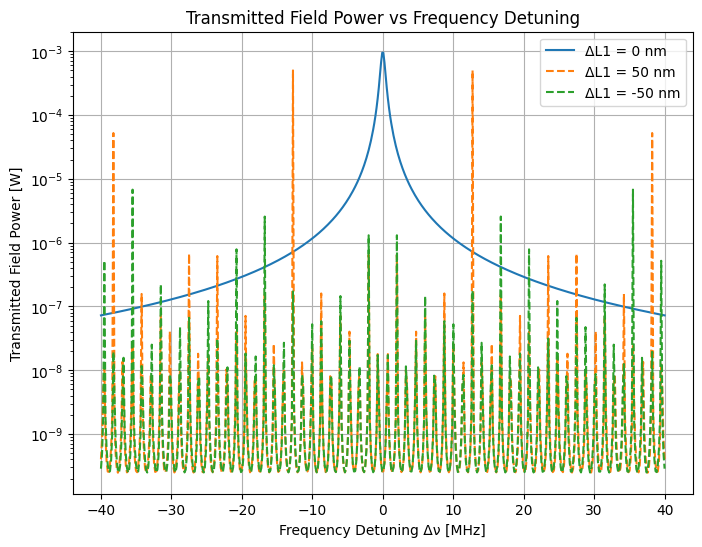

In [121]:
delta_L1_values = [0, 50e9, -50e9]

plt.figure(figsize=(8, 6))

for delta in delta_L1_values:
    exp_L1 = np.exp(1j * omega * (L1_0 + delta)/ c)
    exp_L2 = np.exp(1j * omega * L2 / c)
    exp_total_1 = np.exp(1j * omega * (L1_0 + L2 + delta) / c)
    exp_total_2 = np.exp(2j * omega * (L1_0 + L2 +delta) / c)

    # Transmission amplitude: three-mirror cavity
    numerator = -t1 * t2 * t3 * exp_total_1
    denominator = exp_total_2 - r1 * r2 * exp_L2 - r2 * r3 * exp_L1 + r1 * r3 * (r2**2 + t2**2)
    t_3_mirror = numerator / denominator
    transmitted_power_3_mirror = np.abs(t_3_mirror)**2

    # Plot for each delta_L1
    label = f'ΔL1 = {delta * 1e-9:.0f} nm'
    linestyle = '--' if delta != 0 else '-'
    plt.plot(delta_nu * 1e-6, transmitted_power_3_mirror, label=label, linestyle=linestyle)

# Formatting plot
plt.yscale('log')
plt.xlabel('Frequency Detuning Δν [MHz]')
plt.ylabel('Transmitted Field Power [W]')
plt.title('Transmitted Field Power vs Frequency Detuning')
plt.legend()
plt.grid(True)
plt.show()

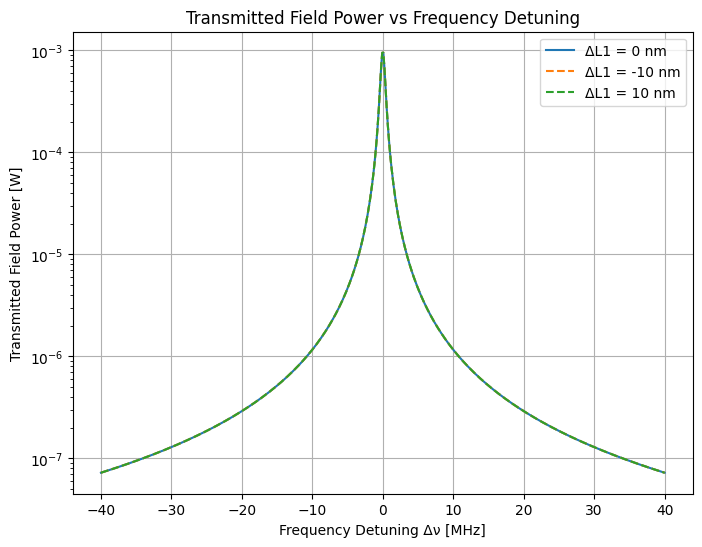

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
c = 3e8  # Speed of light (m/s)
L1 = 0.07  # Length of the first sub-cavity (m)
L2 = 0.07  # Length of the second sub-cavity (m)
wavelength = 1064e-9  # Wavelength (m)
f_carrier = c / wavelength
k = 2 * np.pi / wavelength  # Wave number

# Corrected mirror transmission and reflection coefficients for strong coupling
t1, t2, t3 = np.sqrt(0.001), np.sqrt(0.001), np.sqrt(0.001)  # 99.9% reflectivity
r1, r2, r3 = np.sqrt(1 - t1**2), np.sqrt(1 - t2**2), np.sqrt(1 - t3**2)  

# Frequency detuning range (focus on a small region to see double peaks)
delta_nu = np.linspace(-40e6, 40e6, 500)  # Frequency detuning (Hz)
omega = 2 * np.pi * delta_nu  # Angular frequency detuning

# Microscopic length detunings
delta_L1_values = [0, -10e-9, 10e-9]  # 0 nm, -10 nm, +10 nm

# Prepare plot
plt.figure(figsize=(8, 6))

for delta_L1 in delta_L1_values:
    # Effective detuning: shift the input frequency based on microscopic detuning
    omega_effective = omega + (c * delta_L1 / (L1 * wavelength))

    # Exponential terms with proper phase accumulation for the doublet
    exp_L1 = np.exp(1j * omega * (L1 +delta_L1)/ c)
    exp_L2 = np.exp(1j * omega * L2 / c)
    exp_total_1 = np.exp(1j * omega * (L1 + L2 + delta_L1) / c)
    exp_total_2 = np.exp(2j * omega * (L1 + L2 + delta_L1) / c)

    # Transmission amplitude: three-mirror cavity
    numerator = -t1 * t2 * t3 * exp_total_1
    denominator = exp_total_2 - r1 * r2 * exp_L2 - r2 * r3 * exp_L1 + r1 * r3 * (r2**2 + t2**2)
    t_3_mirror = numerator / denominator
    transmitted_power_3_mirror = np.abs(t_3_mirror)**2

    # Plot for each delta_L1
    label = f'ΔL1 = {delta_L1 * 1e9:.0f} nm'
    linestyle = '--' if delta_L1 != 0 else '-'
    plt.plot(delta_nu * 1e-6, transmitted_power_3_mirror, label=label, linestyle=linestyle)

# Formatting plot
plt.yscale('log')
plt.xlabel('Frequency Detuning Δν [MHz]')
plt.ylabel('Transmitted Field Power [W]')
plt.title('Transmitted Field Power vs Frequency Detuning')
plt.legend()
plt.grid(True)
plt.show()


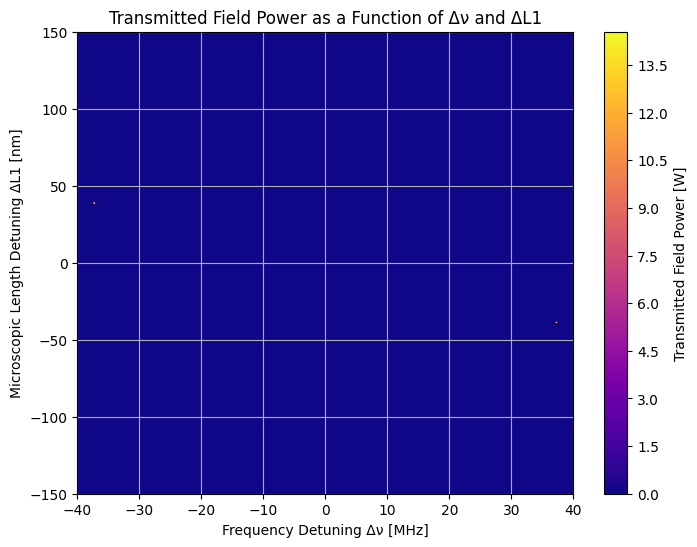

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
c = 3e8  # Speed of light (m/s)
L1 = 0.07  # Length of the first sub-cavity (m)
L2 = 0.07  # Length of the second sub-cavity (m)
wavelength = 1064e-9  # Wavelength (m)
f_carrier = c / wavelength
k = 2 * np.pi / wavelength  # Wave number

# Mirror transmission and reflection coefficients
t1, t2, t3 = np.sqrt(0.001), np.sqrt(0.001), np.sqrt(0.001)  
r1, r2, r3 = np.sqrt(1 - t1**2), np.sqrt(1 - t2**2), np.sqrt(1 - t3**2)  

# Frequency detuning range
delta_nu = np.linspace(-40e6, 40e6, 500)  # Frequency detuning (Hz)
omega = 2 * np.pi * delta_nu  # Angular frequency detuning

# Microscopic length detuning range
delta_L1_values = np.linspace(-150e-9, 150e-9, 500)  # Microscopic detuning (m)

# Create a grid for delta_nu and delta_L1
delta_nu_grid, delta_L1_grid = np.meshgrid(delta_nu, delta_L1_values)

# Calculate the transmitted power over the grid
transmitted_power = np.zeros_like(delta_nu_grid, dtype=np.float64)

for i in range(delta_L1_grid.shape[0]):
    # Effective frequency detuning due to delta_L1
    omega_effective = omega + (c * delta_L1_grid[i, :] / (L1 * wavelength))

    # Exponential terms with effective detuning
    exp_L1 = np.exp(1j * omega_effective * L1 / c)
    exp_L2 = np.exp(1j * omega * L2 / c)
    exp_total_1 = np.exp(1j * omega_effective * (L1 + L2) / c)
    exp_total_2 = np.exp(2j * omega_effective * (L1 + L2) / c)

    # Transmission amplitude: three-mirror cavity
    numerator = -t1 * t2 * t3 * exp_total_1
    denominator = exp_total_2 - r1 * r2 * exp_L2 - r2 * r3 * exp_L1 + r1 * r3 * (r2**2 + t2**2)
    t_3_mirror = numerator / denominator
    transmitted_power[i, :] = np.abs(t_3_mirror)**2

# Plotting the color map
plt.figure(figsize=(8, 6))
plt.contourf(delta_nu * 1e-6, delta_L1_values * 1e9, transmitted_power, levels=100, cmap='plasma')
plt.colorbar(label='Transmitted Field Power [W]')
plt.xlabel('Frequency Detuning Δν [MHz]')
plt.ylabel('Microscopic Length Detuning ΔL1 [nm]')
plt.title('Transmitted Field Power as a Function of Δν and ΔL1')
plt.grid(True)
plt.show()
